# Pymaceuticals Inc.
---

### Analysis

Two of the drugs namely Capomulin and Ramicane tested favourably in reducing tumor size. Data shows that these two drugs are almost on par in reducing tumor size. 

Data shows that one of the two effective drugs, Capomulin, shows effectivity after 20 days. It shows that tumor volume shrunk starting 20 days onwards.

Data has strong and positive correlation with 0.84 based on Pearson’s correlation coefficient.

In [239]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_meta_study = pd.merge(mouse_metadata, study_results, how="right")
combined_meta_study = combined_meta_study[['Mouse ID', 'Timepoint', 
                                           'Tumor Volume (mm3)', 'Metastatic Sites', 
                                           'Drug Regimen', 'Sex', 'Age_months', 
                                           'Weight (g)']]

# Display the data table for preview
combined_meta_study.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [240]:
# Checking the number of mice.
combined_meta_study['Mouse ID'].nunique()

249

In [241]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
d_mice = combined_meta_study.loc[combined_meta_study.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
d_mice

array(['g989'], dtype=object)

In [242]:
# Optional: Get all the data for the duplicate mouse ID. 
d_mice_df = combined_meta_study.loc[combined_meta_study["Mouse ID"] == d_mice[0], :]
d_mice_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [243]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_meta_study[combined_meta_study['Mouse ID'].isin(d_mice)==False]
cleaned_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [244]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [245]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_median = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_variance = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_std = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_sem = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, 
                            "Median Tumor Volume":drug_regimen_median, 
                            "Tumor Volume Variance":drug_regimen_variance, 
                            "Tumor Volume Std. Dev.": drug_regimen_std,
                            "Tumor Volume Std. Err.": drug_regimen_sem})
summary_df



Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [246]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [247]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouseid_count = cleaned_df["Drug Regimen"].value_counts()

In [248]:
mouseid_rows = cleaned_df["Drug Regimen"].value_counts()
mouseid_rows

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

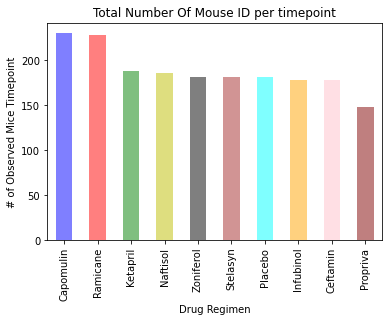

In [249]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt_mouseid = mouseid_rows.plot.bar(color=['b', 'r', 'g', 'y', 'k','brown','cyan','orange','pink','maroon'], alpha = .50)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoint")
plt.title("Total Number Of Mouse ID per timepoint")

plt.show()

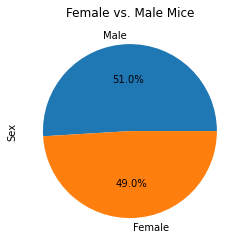

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = cleaned_df["Sex"].value_counts()
gender_df.plot.pie(autopct= "%.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

In [251]:
malecountpct = (gender_df[0]/gender_df.sum())*100
femalecountpct = (gender_df[1]/gender_df.sum())*100
gender_df.shape

(2,)

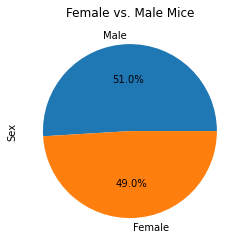

In [252]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [femalecountpct, malecountpct]
plot = gender_df.plot.pie(y='Total Count', autopct="%.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [253]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mousedf = combined_meta_study.groupby(["Mouse ID"]).max()
mousedf_reset = mousedf.reset_index()
merged_data = mousedf_reset[['Mouse ID','Timepoint']].merge(combined_meta_study,on=['Mouse ID','Timepoint'],how="left")

In [254]:
# Start by getting the last (greatest) timepoint for each mouse
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_meta_study[combined_meta_study["Drug Regimen"].isin(drug_list)]
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
#drugs.head()


In [255]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
def get_outliers(regimen):
    regimen_df = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_df.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_df.loc[(regimen_df < lower_bound) | (regimen_df > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_df
    
capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [256]:
# add subset 
# Determine outliers using upper and lower bounds
counter = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if counter == 0:
        print(f"------------------------------------------------------------")
    print(f"{drug}")
    print(f"Lower quartile of {drug} treatments is: {lowerq}")
    print(f"Upper quartile of {drug} treatments is: {upperq}")
    print(f"Interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    counter+=1

------------------------------------------------------------
Capomulin
Lower quartile of Capomulin treatments is: 32.38
Upper quartile of Capomulin treatments is: 40.16
Interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
Ramicane
Lower quartile of Ramicane treatments is: 31.56
Upper quartile of Ramicane treatments is: 40.66
Interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
Infubinol
Lower quartile of Infubinol treatments is: 54.05
Upper quartile of Infubinol treatments is: 65.53
Interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
----------------------------------------------------

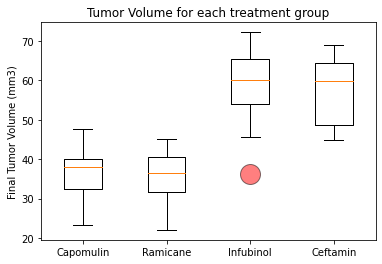

In [257]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker = dict(markerfacecolor = "red", markersize=20, alpha = .50)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= marker)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume for each treatment group')
plt.show()

## Line and Scatter Plots

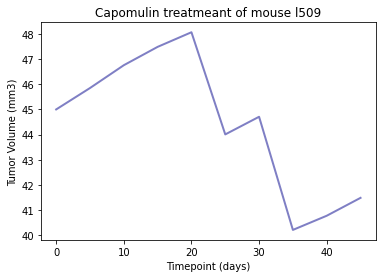

In [258]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="darkblue", label="Fahreneit", alpha = .50)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

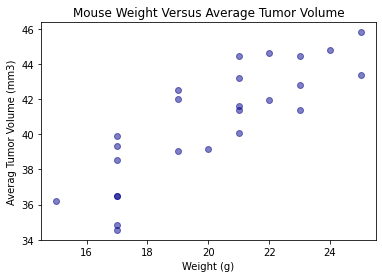

In [259]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
ave_capomulin =capomulin_df.groupby(['Mouse ID']).mean()
marker_size=15
plt.scatter(ave_capomulin['Weight (g)'],ave_capomulin['Tumor Volume (mm3)'], color="darkblue", alpha=.50)
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


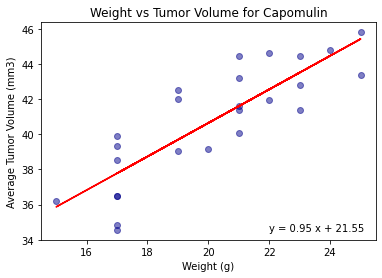

In [260]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(ave_capomulin['Weight (g)'],ave_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(ave_capomulin["Weight (g)"],ave_capomulin["Tumor Volume (mm3)"])
regress_values=ave_capomulin["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(ave_capomulin["Weight (g)"],ave_capomulin["Tumor Volume (mm3)"],color="darkblue", alpha=.50)
plt.plot(ave_capomulin["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(22,34.5))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
